In [2]:
# %matplotlib widget

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import librosa, librosa.display
import scipy as sklearn
from sklearn import preprocessing
from itertools import chain


In [2]:
df_3 = pd.read_csv('/Users/jonghochoi/Desktop/env1/Data/features_3_sec.csv')
df_30 = pd.read_csv('/Users/jonghochoi/Desktop/env1/Data/features_30_sec.csv')

In [3]:
x, sr = librosa.load('/Users/jonghochoi/Desktop/env1/Data/genres_original/blues/blues.00000.wav')

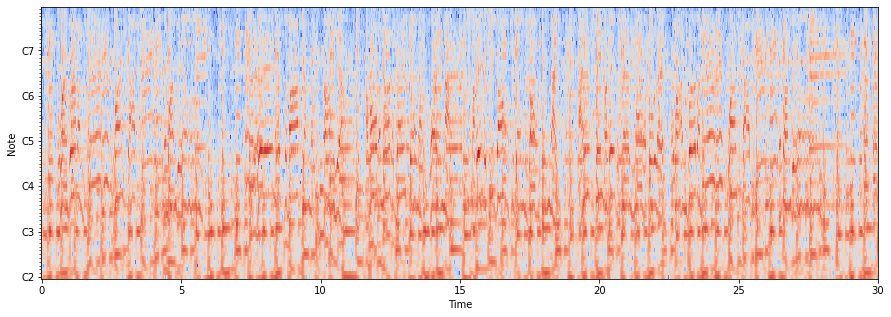

In [4]:
fmin = librosa.midi_to_hz(36)
hop_length = 512
C = librosa.cqt(x, sr=sr, fmin=fmin, n_bins=72, hop_length=hop_length)

logC = librosa.amplitude_to_db(np.abs(C))
plt.figure(figsize=(15, 5))
librosa.display.specshow(logC, sr=sr, x_axis='time', y_axis='cqt_note', fmin=fmin, cmap='coolwarm')

/var/folders/dz/vfy0qyvs2998fyfq8kysgt540000gn/T/ipykernel_28283/151919768.py:4: FutureWarning: Pass y=[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)


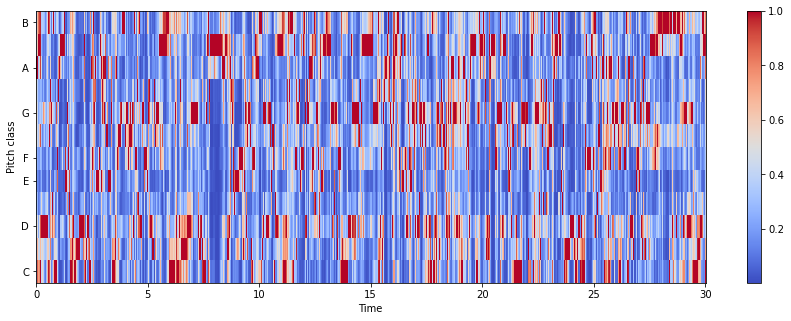

In [5]:
### Short-time Fourier Transformation (STFT) ###
### https://en.wikipedia.org/wiki/Short-time_Fourier_transform ###

chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.colorbar()

/var/folders/dz/vfy0qyvs2998fyfq8kysgt540000gn/T/ipykernel_28283/3080680597.py:5: FutureWarning: Pass y=[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chromagram = librosa.feature.chroma_cqt(x, sr=sr, hop_length=hop_length)


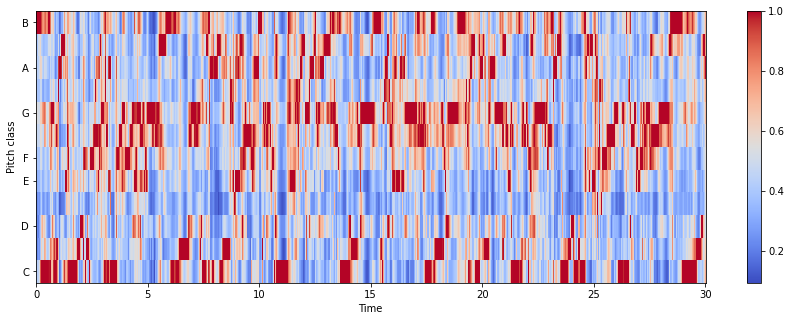

In [6]:
### Constant-Q Transform (CQT) ###
### https://en.wikipedia.org/wiki/Constant-Q_transform ###
# Better suited for musical representations #

chromagram = librosa.feature.chroma_cqt(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.colorbar()

/var/folders/dz/vfy0qyvs2998fyfq8kysgt540000gn/T/ipykernel_28283/1732356622.py:7: FutureWarning: Pass y=[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chromagram = librosa.feature.chroma_cens(x, sr=sr, hop_length=hop_length)


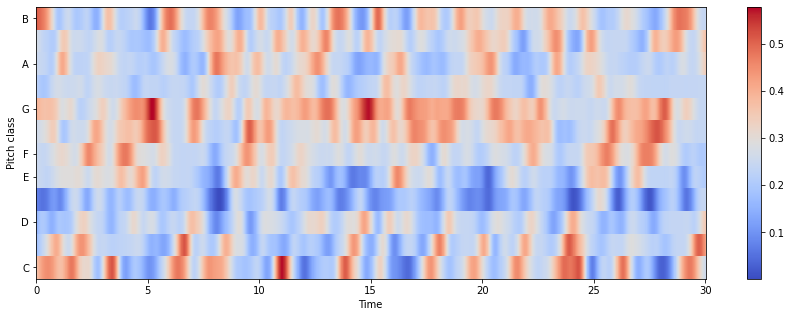

In [7]:
### Chroma Energy Normalized Statistics (CENS) ###
### https://musicinformationretrieval.com/chroma.html ###
# "The main idea of CENS features is that taking statistics over large windows smooths local deviations in 
# tempo, articulation, and musical ornaments such as trills and arpeggiated chords. 
# CENS are best used for tasks such as audio matching and similarity." #

chromagram = librosa.feature.chroma_cens(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.colorbar()

/var/folders/dz/vfy0qyvs2998fyfq8kysgt540000gn/T/ipykernel_28283/4266660271.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


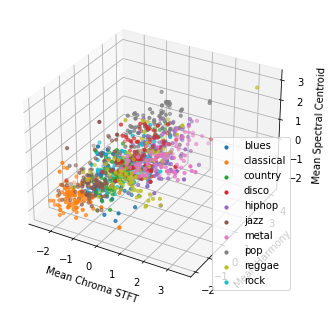

In [8]:
ohe = preprocessing.OneHotEncoder()

labels = ohe.fit_transform(df_30[['label']]).toarray().astype(int)
features = df_30[['chroma_stft_mean', 'rms_mean', 'spectral_centroid_mean']]

scaler = preprocessing.StandardScaler()
features_scaled = scaler.fit_transform(features)

categories = list(chain(*ohe.categories_))
labels = pd.DataFrame(labels, columns=categories)

features_scaled = pd.DataFrame(features_scaled, columns=['chroma_stft_mean', 'rms_mean', 'spectral_centroid_mean'])
features_scaled = features_scaled.join(labels)

fig = plt.figure()
ax = Axes3D(fig)

plt.xlabel('Mean Chroma STFT')
plt.ylabel('Mean Harmony')
ax.set_zlabel('Mean Spectral Centroid')

for genre in categories:
    ax.scatter(features_scaled['chroma_stft_mean'][features_scaled[genre]==1], 
                features_scaled['rms_mean'][features_scaled[genre]==1],
                features_scaled['spectral_centroid_mean'][features_scaled[genre]==1],
                s=10,
                label=genre)

ax.legend()

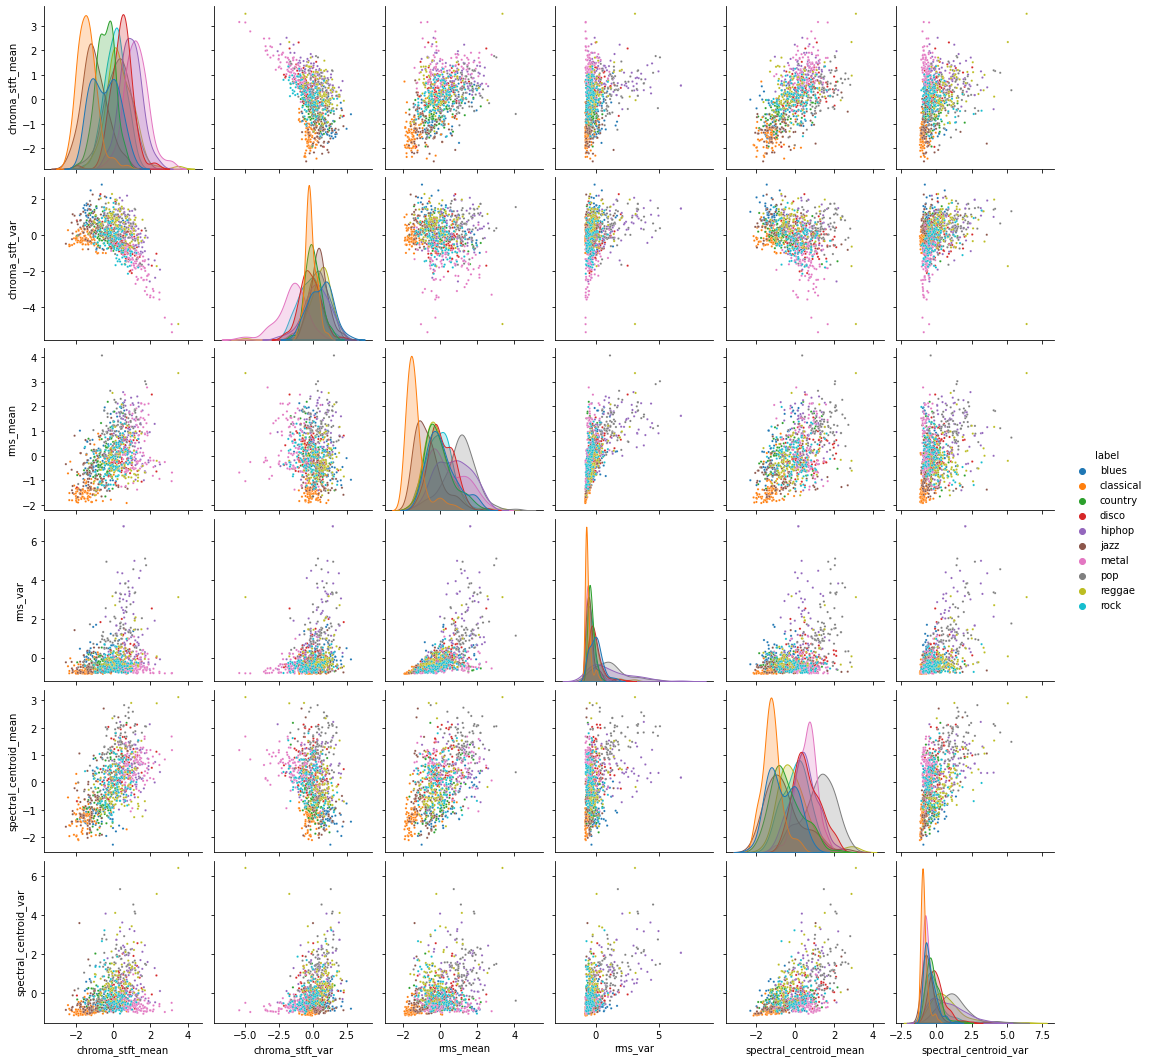

In [9]:
import seaborn as sns

data_pair = df_30[['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var']]

scaler = preprocessing.StandardScaler()
features_scaled = scaler.fit_transform(data_pair)
features_scaled = pd.DataFrame(features_scaled, columns=['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var'])
features_scaled['label'] = df_30['label']

sns.pairplot(features_scaled, hue='label', plot_kws={"s": 5})

Text(0.5, 1.0, 'Variance Explained Through Components')

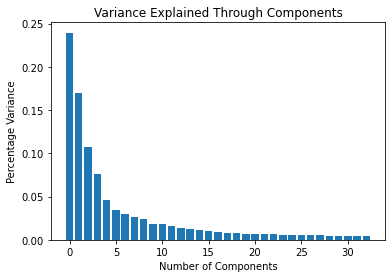

In [10]:
from sklearn.decomposition import PCA

feature_set = ['chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var']

x = df_30.loc[:, feature_set].values
y = df_30.loc[:, ['label']].values
x = scaler.fit_transform(x)

pca = PCA(0.95)
principle_components = pca.fit_transform(x)
principle_df = pd.DataFrame(data=principle_components)

final_df = principle_df.add_prefix('Component_')
final_df = pd.concat([principle_df, df_30[['label']]], axis=1)
final_df.rename(columns={'Component_label':'label'})

final_df
plt.bar(final_df.iloc[:,:-1].columns, pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Percentage Variance')
plt.title('Variance Explained Through Components')

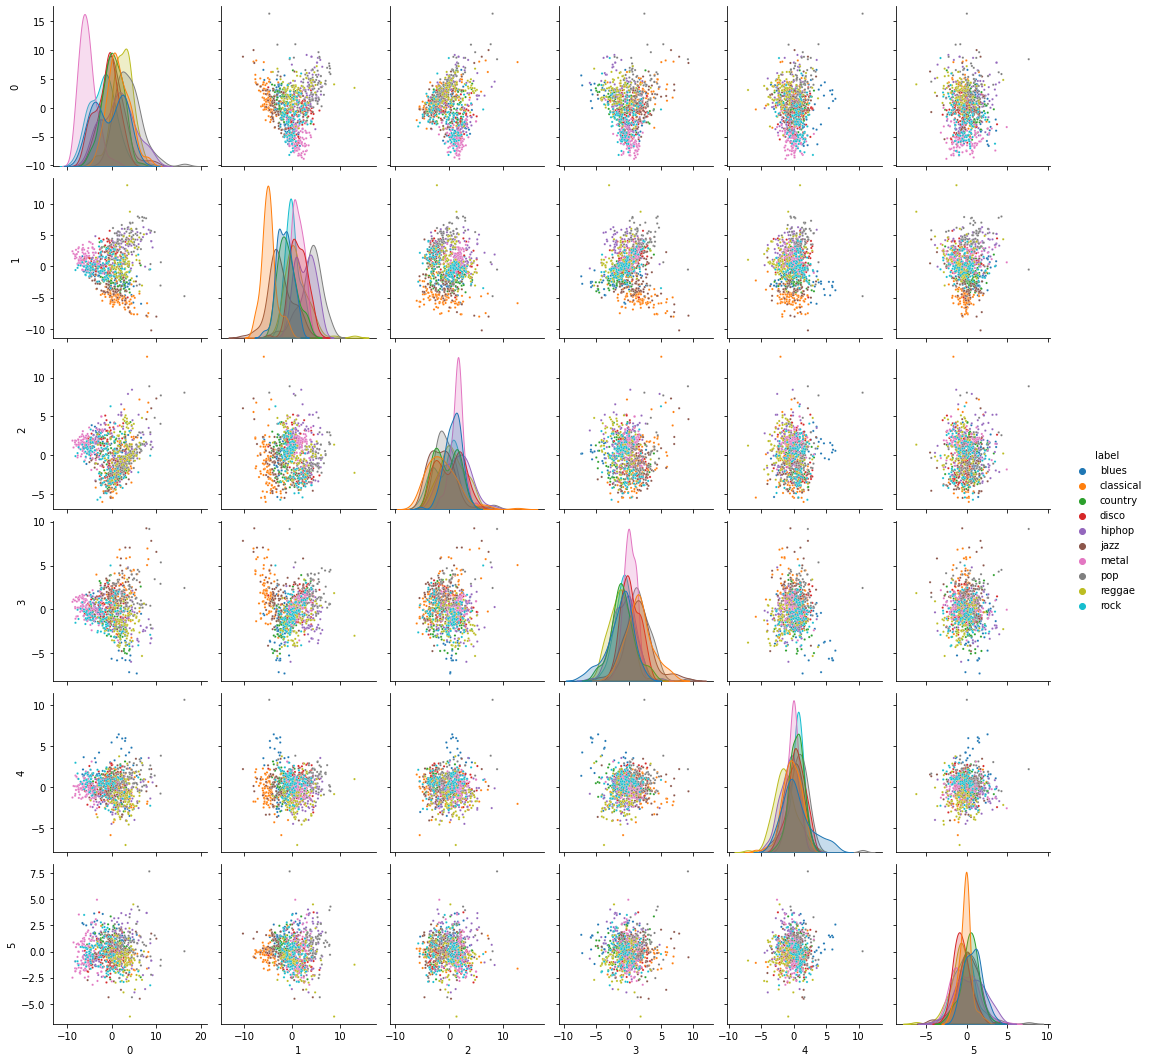

In [11]:
PCA_pair = final_df.iloc[:,:6]
PCA_pair['label'] = final_df['label']

sns.pairplot(PCA_pair, hue='label', plot_kws={"s": 5})

/opt/anaconda3/envs/env1/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Component 1')

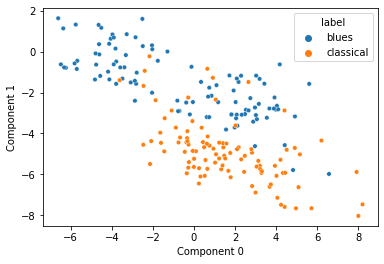

In [12]:
PCA_visualize = final_df.iloc[:199]

sns.scatterplot(0, 1, data=PCA_visualize, hue='label', s=20)
plt.xlabel('Component 0')
plt.ylabel('Component 1')

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

accuracy_tree = []
accuracy_forest = []
trials = 10

for i in range(trials):
    X_train, X_test, y_train, y_test = train_test_split(final_df.iloc[:,:-1], final_df.iloc[:,-1])

    dtree = DecisionTreeClassifier()
    dtree.fit(X_train, y_train)

    rforest = RandomForestClassifier()
    rforest.fit(X_train, y_train)

    predictions_d = dtree.predict(X_test)
    predictions_r = rforest.predict(X_test)

    

    accuracy_tree.append(accuracy_score(y_test, predictions_d))
    accuracy_forest.append(accuracy_score(y_test, predictions_r))

avg_tree = np.mean(accuracy_tree)
avg_forest = np.mean(accuracy_forest)

print('Average Decision Tree Accuracy for ' + str(trials) + ' trials: ' + str(avg_tree))
print('Average Random Forest Accuracy for ' + str(trials) + ' trials: ' + str(avg_forest))


Average Decision Tree Accuracy for 10 trials: 0.4556
Average Random Forest Accuracy for 10 trials: 0.6719999999999999


In [1]:
y_test
predictions_d
categories = ['hiphop', 'reggae', 'classical', 'rock', 'blues', 'jazz', 'pop', 'disco', 'metal', 'country']

# for genre in categories:
#     for i in range(len(y_test)):
#         x = 1

def evaluate_perf(predictions, actual, genre):
    results = {'hiphop' : 0, 'reggae' : 0, 'classical' : 0, 'rock' : 0, 'blues' : 0, 'jazz' : 0, 'pop' : 0, 'disco' : 0, 'metal' : 0, 'country' : 0}
    for i in range(len(predictions)):
        if predictions[i] == genre:
            results[genre] += 1
        else:
            results[actual[i]] += 1
    return results

s = evaluate_perf(predictions_d, y_test, 'blues')

NameError: name 'y_test' is not defined

/opt/anaconda3/envs/env1/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/envs/env1/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

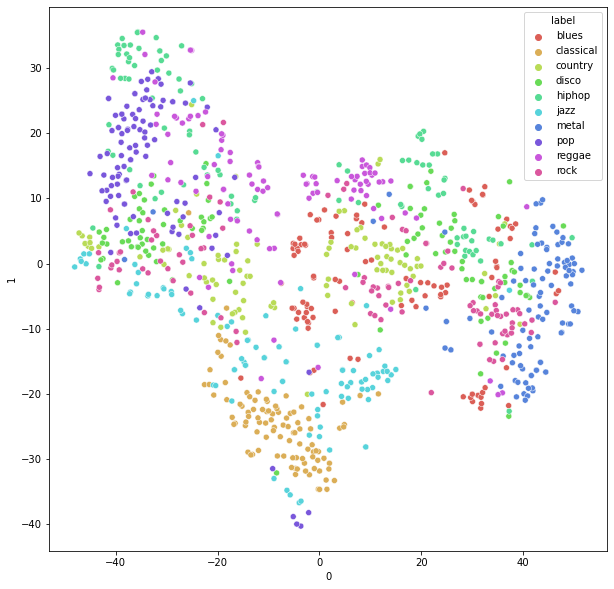

In [14]:
# tSNE Visualization #
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
tsne_res = tsne.fit_transform(final_df.iloc[:,:-1])
tsne_final = pd.DataFrame(tsne_res)
tsne_final['label'] = final_df['label']

plt.figure(figsize=(10,10))
sns.scatterplot(x=tsne_final.iloc[:,0], y=tsne_final.iloc[:,1], hue=tsne_final['label'], palette=sns.hls_palette(10), legend='full')


/opt/anaconda3/envs/env1/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/envs/env1/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

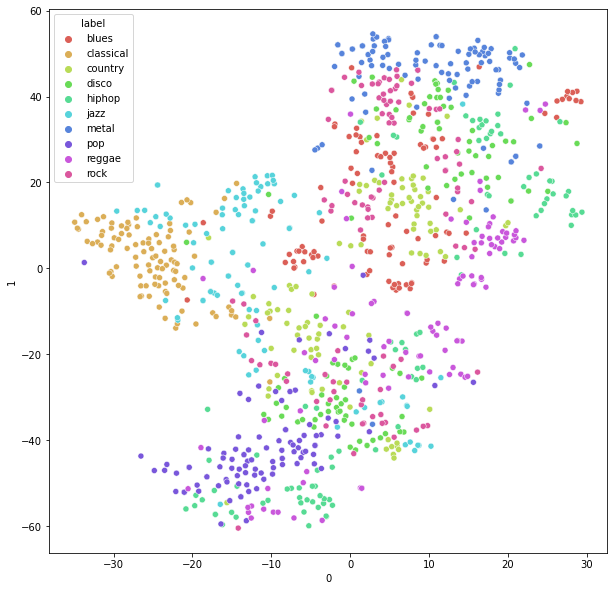

In [15]:
# tSNE Visualization without PCA #
tsne = TSNE(n_components=2, random_state=0)
tsne_res = tsne.fit_transform(x)
tsne_final = pd.DataFrame(tsne_res)
tsne_final['label'] = final_df['label']

plt.figure(figsize=(10,10))
sns.scatterplot(x=tsne_final.iloc[:,0], y=tsne_final.iloc[:,1], hue=tsne_final['label'], palette=sns.hls_palette(10), legend='full')